In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
!pip install torch==1.10.2 torchvision==0.11.3+cu113 -f https://download.pytorch.org/whl/torch_stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |██████████████████████████▊     | 834.1 MB 1.3 MB/s eta 0:02:02tcmalloc: large alloc 1147494400 bytes == 0x39f4a000 @  0x7f624bd7e615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |████████████████████████████████| 997.4 MB 1.2 MB/s eta 0:00:01tcmalloc: large alloc 1246756864 bytes == 0xb9cd2000 @  0x7f624bd7e615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x511e2c 0x549576 0x593fce 0x511e2c 0x549576 0x593fce 0x511e2c 0x549576 0x593fce 0x511e2c 0x549576 0x593fce 0x511e2c 0x593dd7 0x511e2c 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576
     |██████

In [ ]:
pip install allennlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 729 kB 24.7 MB/s 
     |████████████████████████████████| 880 kB 47.5 MB/s 
     |████████████████████████████████| 229 kB 48.7 MB/s 
     |████████████████████████████████| 125 kB 51.0 MB/s 
     |████████████████████████████████| 6.2 MB 41.9 MB/s 
     |████████████████████████████████| 298 kB 53.8 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
     |████████████████████████████████| 1.2 MB 43.4 MB/s 
     |████████████████████████████████| 101 kB 9.4 MB/s 
     |████████████████████████████████| 1.0 MB 49.7 MB/s 
     |████████████████████████████████| 106 kB 61.0 MB/s 
     |████████████████████████████████| 248 kB 60.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████|

In [ ]:
!pip install --upgrade kornia

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 517 kB 21.6 MB/s 


In [ ]:
!pip install --upgrade fastai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import fastai; fastai.__version__

'2.7.9'

In [ ]:
import os
import glob
import cv2
import imageio

import numpy as np 
import pandas as pd 
import nibabel as nib
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm
from ipywidgets import *
from PIL import Image
from matplotlib.pyplot import figure

from fastai.basics import *
from fastai.vision.all import *
from fastai.data.transforms import *


In [ ]:
path= '/content/gdrive/My Drive/Colab Notebooks/dataset'

In [ ]:
# Create a meta file for nii files processing

data = []
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        data.append((dirname, filename)) 

liver_data = pd.DataFrame(data, columns =['dirname', 'filename']) 
liver_data.sort_values(by=['filename'], ascending=True) 

,dirname,filename
0,/content/gdrive/My Drive/Colab Notebooks/dataset,segmentation-0.nii
1,/content/gdrive/My Drive/Colab Notebooks/dataset,segmentation-1.nii
2,/content/gdrive/My Drive/Colab Notebooks/dataset,segmentation-10.nii
3,/content/gdrive/My Drive/Colab Notebooks/dataset,segmentation-100.nii
4,/content/gdrive/My Drive/Colab Notebooks/dataset,segmentation-101.nii
...,...,...
227,/content/gdrive/My Drive/Colab Notebooks/dataset,volume-95.nii
228,/content/gdrive/My Drive/Colab Notebooks/dataset,volume-96.nii
229,/content/gdrive/My Drive/Colab Notebooks/dataset,volume-97.nii
230,/content/gdrive/My Drive/Colab Notebooks/dataset,volume-98.nii


In [ ]:
# Map CT scan and label 

liver_data["mask_dirname"]  = ""
liver_data["mask_filename"] = ""

for i in range(131):
    ct = f"volume-{i}.nii"
    mask = f"segmentation-{i}.nii"
    
    liver_data.loc[liver_data['filename'] == ct, 'mask_filename'] = mask
    liver_data.loc[liver_data['filename'] == ct, 'mask_dirname'] = path

# drop segment rows
liver_data = liver_data[liver_data.mask_filename != ''].sort_values(by=['filename']).reset_index(drop=True) 

liver_data

,dirname,filename,mask_dirname,mask_filename
0,/content/gdrive/My Drive/Colab Notebooks/dataset,volume-0.nii,/content/gdrive/My Drive/Colab Notebooks/dataset,segmentation-0.nii
1,/content/gdrive/My Drive/Colab Notebooks/dataset,volume-1.nii,/content/gdrive/My Drive/Colab Notebooks/dataset,segmentation-1.nii
2,/content/gdrive/My Drive/Colab Notebooks/dataset,volume-10.nii,/content/gdrive/My Drive/Colab Notebooks/dataset,segmentation-10.nii
3,/content/gdrive/My Drive/Colab Notebooks/dataset,volume-100.nii,/content/gdrive/My Drive/Colab Notebooks/dataset,segmentation-100.nii
4,/content/gdrive/My Drive/Colab Notebooks/dataset,volume-101.nii,/content/gdrive/My Drive/Colab Notebooks/dataset,segmentation-101.nii
...,...,...,...,...
126,/content/gdrive/My Drive/Colab Notebooks/dataset,volume-95.nii,/content/gdrive/My Drive/Colab Notebooks/dataset,segmentation-95.nii
127,/content/gdrive/My Drive/Colab Notebooks/dataset,volume-96.nii,/content/gdrive/My Drive/Colab Notebooks/dataset,segmentation-96.nii
128,/content/gdrive/My Drive/Colab Notebooks/dataset,volume-97.nii,/content/gdrive/My Drive/Colab Notebooks/dataset,segmentation-97.nii
129,/content/gdrive/My Drive/Colab Notebooks/dataset,volume-98.nii,/content/gdrive/My Drive/Colab Notebooks/dataset,segmentation-98.nii


In [ ]:
def read_nii(filepath):
    '''
    Reads .nii file and returns pixel array
    '''
    ct_scan = nib.load(filepath)
    array   = ct_scan.get_fdata()
    array   = np.rot90(np.array(array))
    return(array)

In [ ]:
sample = 100
sample_ct = read_nii(liver_data.loc[sample,'dirname']+"/"+liver_data.loc[sample,'filename'])
sample_mask = read_nii(liver_data.loc[sample,'mask_dirname']+"/"+liver_data.loc[sample,'mask_filename'])

print(f'CT Shape:   {sample_ct.shape}\nMask Shape: {sample_mask.shape}')

CT Shape:   (512, 512, 94)
Mask Shape: (512, 512, 94)


In [ ]:
print(np.amin(sample_ct), np.amax(sample_ct))
print(np.amin(sample_mask), np.amax(sample_mask))

-1032.0 1543.0
0.0 2.0


In [ ]:
!pip list

Package                       Version
----------------------------- ----------------------------
absl-py                       1.2.0
aiohttp                       3.8.1
aiosignal                     1.2.0
alabaster                     0.7.12
albumentations                1.2.1
altair                        4.2.0
appdirs                       1.4.4
arviz                         0.12.1
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
async-timeout                 4.0.2
asynctest                     0.13.0
atari-py                      0.2.9
atomicwrites                  1.4.1
attrs                         22.1.0
audioread                     2.1.9
autograd                      1.4
Babel                         2.10.3
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        5.0.1
blis                          0.7.8
bokeh                         2.3.3
branca                        0.5.0


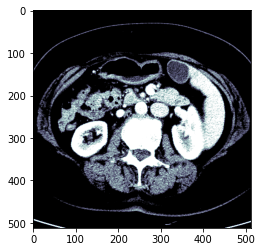

In [ ]:
import types
dicom_windows = types.SimpleNamespace(
    brain=(80,40),
    subdural=(254,100),
    stroke=(8,32),
    brain_bone=(2800,600),
    brain_soft=(375,40),
    lungs=(1500,-600),
    mediastinum=(350,50),
    abdomen_soft=(400,50),
    liver=(150,30),
    spine_soft=(250,50),
    spine_bone=(1800,400),
    custom = (200,60)
)


@patch
def windowed(self:Tensor, w, l):
    px = self.clone()
    px_min = l - w//2
    px_max = l + w//2
    px[px<px_min] = px_min
    px[px>px_max] = px_max
    return (px-px_min) / (px_max-px_min)

plt.imshow(tensor(sample_ct[..., 59].astype(np.float32)).windowed(*dicom_windows.liver), cmap=plt.cm.bone);

In [ ]:
def plot_sample(array_list, color_map = 'nipy_spectral'):
    '''
    Plots and a slice with all available annotations
    '''
    fig = plt.figure(figsize=(18,15))

    plt.subplot(1,4,1)
    plt.imshow(array_list[0], cmap='bone')
    plt.title('Original Image')
    
    plt.subplot(1,4,2)
    plt.imshow(tensor(array_list[0].astype(np.float32)).windowed(*dicom_windows.liver), cmap='bone');
    plt.title('Windowed Image')
    
    plt.subplot(1,4,3)
    plt.imshow(array_list[1], alpha=0.5, cmap=color_map)
    plt.title('Mask')
    
    plt.subplot(1,4,4)
    plt.imshow(array_list[0], cmap='bone')
    plt.imshow(array_list[1], alpha=0.5, cmap=color_map)
    plt.title('Liver & Mask')


    plt.show()

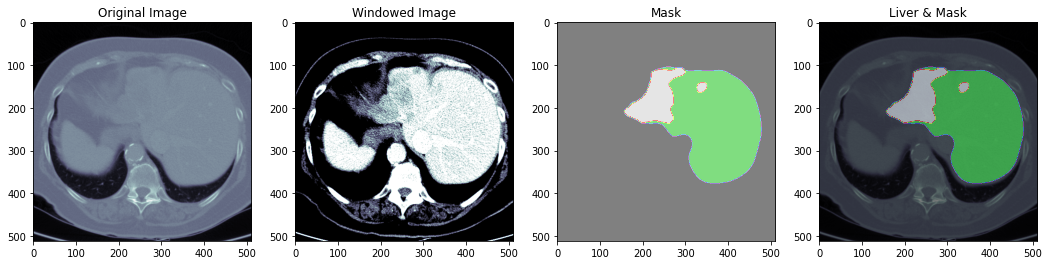

In [ ]:
sample = 80

sample_slice = tensor(sample_ct[...,sample].astype(np.float32))

plot_sample([sample_ct[..., sample],
             sample_mask[..., sample]])

(512, 512)
[[     0 208265]
 [     1  43799]
 [     2  10080]]


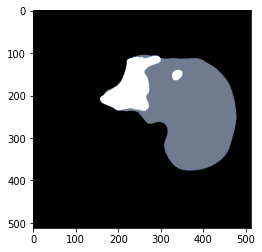

In [ ]:
# Check the mask values
mask = Image.fromarray(sample_mask[...,sample].astype('uint8'), mode="L")
print(mask.shape)
unique, counts = np.unique(mask, return_counts=True)
print( np.array((unique, counts)).T)
plt.imshow(mask , cmap = 'bone')

In [ ]:
# Preprocessing functions
class TensorCTScan(TensorImageBW): _show_args = {'cmap':'bone'}

@patch
def freqhist_bins(self:Tensor, n_bins=100):
    "A function to split the range of pixel values into groups, such that each group has around the same number of pixels"
    imsd = self.view(-1).sort()[0]
    t = torch.cat([tensor([0.001]),
                   torch.arange(n_bins).float()/n_bins+(1/2/n_bins),
                   tensor([0.999])])
    t = (len(imsd)*t).long()
    return imsd[t].unique()
    
@patch
def hist_scaled(self:Tensor, brks=None):
    "Scales a tensor using `freqhist_bins` to values between 0 and 1"
    if self.device.type=='cuda': return self.hist_scaled_pt(brks)
    if brks is None: brks = self.freqhist_bins()
    ys = np.linspace(0., 1., len(brks))
    x = self.numpy().flatten()
    x = np.interp(x, brks.numpy(), ys)
    return tensor(x).reshape(self.shape).clamp(0.,1.)    
    
@patch
def to_nchan(x:Tensor, wins, bins=None):
    res = [x.windowed(*win) for win in wins]
    if not isinstance(bins,int) or bins!=0: res.append(x.hist_scaled(bins).clamp(0,1))
    dim = [0,1][x.dim()==3]
    return TensorCTScan(torch.stack(res, dim=dim))

@patch
def save_jpg(x:(Tensor), path, wins, bins=None, quality=90):
    fn = Path(path).with_suffix('.jpg')
    x = (x.to_nchan(wins, bins)*255).byte()
    im = Image.fromarray(x.permute(1,2,0).numpy(), mode=['RGB','CMYK'][x.shape[0]==4])
    im.save(fn, quality=quality)

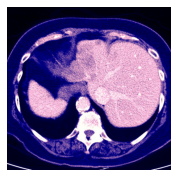

In [ ]:
_,axs=subplots(1,1)

sample_slice.save_jpg('test.jpg', [dicom_windows.liver,dicom_windows.custom])
show_image(Image.open('test.jpg'), ax=axs[0])
#show_image(Image.open('test.png'), ax=axs[0])

In [ ]:
from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(liver_data, test_size=0.5, random_state=25, shuffle=False)

print(f"No. of training examples: {training_data.shape}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: (65, 4)
No. of testing examples: 66


In [ ]:
jpg_files = True


if (jpg_files) :
    
    path = Path(".")

    os.makedirs('train_images',exist_ok=True)
    os.makedirs('train_masks',exist_ok=True)

    for ii in tqdm(range(0,len(training_data))): 
        curr_ct        = read_nii(training_data.loc[ii,'dirname']+"/"+liver_data.loc[ii,'filename'])
        curr_mask      = read_nii(training_data.loc[ii,'mask_dirname']+"/"+liver_data.loc[ii,'mask_filename'])
        curr_file_name = str(training_data.loc[ii,'filename']).split('.')[0]
        #curr_mask_file_name = str(training_data.loc[ii,'mask_filename']).split('.')[0]
        #print('curr_file_name',curr_file_name)
        curr_dim       = curr_ct.shape[2] # 512, 512, curr_dim
        #print('curr_dim',curr_dim)

        for curr_slice in range(0,curr_dim,2): # export every 2nd slice for training
            data = tensor(curr_ct[...,curr_slice].astype(np.float32))
            mask = Image.fromarray(curr_mask[...,curr_slice].astype('uint8'), mode="L")
            data.save_jpg(f"train_images/{curr_file_name}_slice_{curr_slice}.jpg", [dicom_windows.liver,dicom_windows.custom])
            mask.save(f"train_masks/{curr_file_name}_slice_{curr_slice}_mask.png")


  0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
btach_size = 16
image_size = 128

codes = np.array(["background","liver","tumor"])
    
def get_x(fname:Path): return fname

def label_func(x): return path/'train_masks'/f'{x.stem}_mask.png'

tfms = [IntToFloatTensor(),Normalize()]

db = DataBlock(blocks=(ImageBlock(),MaskBlock(codes)),  #codes = {"Backround": 0,"Liver": 1,"Tumor": 2}
               batch_tfms=tfms,
               splitter=RandomSplitter(),
               item_tfms=[Resize(image_size)],
               get_items=get_image_files,
               get_y=label_func)

ds = db.datasets(source='./train_images')
print(len(ds))
print(ds)

16946
(#16946) [(PILImage mode=RGB size=512x512, PILMask mode=L size=512x512),(PILImage mode=RGB size=512x512, PILMask mode=L size=512x512),(PILImage mode=RGB size=512x512, PILMask mode=L size=512x512),(PILImage mode=RGB size=512x512, PILMask mode=L size=512x512),(PILImage mode=RGB size=512x512, PILMask mode=L size=512x512),(PILImage mode=RGB size=512x512, PILMask mode=L size=512x512),(PILImage mode=RGB size=512x512, PILMask mode=L size=512x512),(PILImage mode=RGB size=512x512, PILMask mode=L size=512x512),(PILImage mode=RGB size=512x512, PILMask mode=L size=512x512),(PILImage mode=RGB size=512x512, PILMask mode=L size=512x512)...]


[PILImage mode=RGB size=512x512, PILMask mode=L size=512x512]


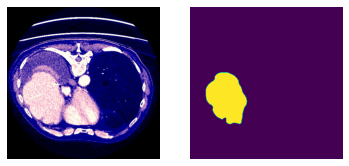

In [ ]:
idx=100
imgs = [ds[idx][0],ds[idx][1]]
print(imgs)
fig,axs = plt.subplots(1, 2)
for i,ax in enumerate(axs.flatten()):
    ax.axis('off')
    ax.imshow(imgs[i]) #, cmap='gray'

In [ ]:
unique, counts = np.unique(array(ds[idx][1]), return_counts=True)

print( np.array((unique, counts)).T)

[[     0 245359]
 [     1  16785]]


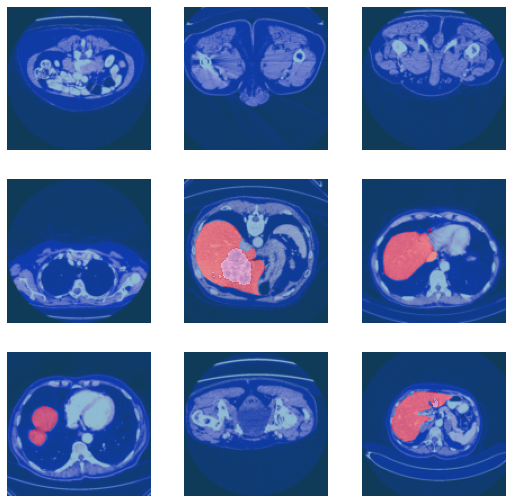

In [ ]:
dls = db.dataloaders(path/'train_images',bs = btach_size) # num_workers=0
dls.show_batch()

In [ ]:
def foreground_acc(inp, targ, bkg_idx=0, axis=1):  # exclude a background from metric
    "Computes non-background accuracy for multiclass segmentation"
    targ = targ.squeeze(1)
    mask = targ != bkg_idx
    return (inp.argmax(dim=axis)[mask]==targ[mask]).float().mean() 

def cust_foreground_acc(inp, targ):  # # include a background into the metric
    return foreground_acc(inp=inp, targ=targ, bkg_idx=3, axis=1) # 3 is a dummy value to include the background which is 0

In [ ]:
learn = unet_learner(dls, resnet34, loss_func=CrossEntropyLossFlat(axis=1), metrics=[foreground_acc, cust_foreground_acc])

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

SuggestedLRs(valley=9.120108734350652e-05)

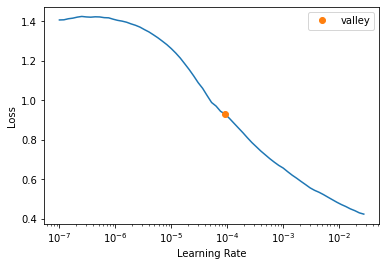

In [ ]:
learn.lr_find()

In [ ]:
learn.fine_tune(50, wd=0.1, cbs=SaveModelCallback())

epoch,train_loss,valid_loss,foreground_acc,cust_foreground_acc,time
0,0.013483,0.009672,0.896020,0.996700,05:39


Better model found at epoch 0 with valid_loss value: 0.009671621955931187.


epoch,train_loss,valid_loss,foreground_acc,cust_foreground_acc,time
0,0.005218,0.005611,0.944523,0.997904,05:34
1,0.004189,0.004456,0.950572,0.998278,05:36
2,0.004054,0.003902,0.949371,0.998498,05:36
3,0.003358,0.003507,0.955345,0.998639,05:37
4,0.003076,0.003626,0.955906,0.998585,04:30
5,0.003147,0.003869,0.951857,0.998594,05:41
6,0.002871,0.003465,0.950448,0.998706,05:37
7,0.003227,0.003375,0.945589,0.998697,05:34
8,0.003087,0.003262,0.958764,0.998768,05:32
9,0.002859,0.003208,0.960098,0.998757,05:36


Better model found at epoch 0 with valid_loss value: 0.005610711872577667.
Better model found at epoch 1 with valid_loss value: 0.004456497263163328.
Better model found at epoch 2 with valid_loss value: 0.0039016755763441324.
Better model found at epoch 3 with valid_loss value: 0.0035072502214461565.
Better model found at epoch 6 with valid_loss value: 0.0034652757458388805.
Better model found at epoch 7 with valid_loss value: 0.003374981926754117.
Better model found at epoch 8 with valid_loss value: 0.003261734265834093.
Better model found at epoch 9 with valid_loss value: 0.003207741305232048.
Better model found at epoch 10 with valid_loss value: 0.0029902239330112934.
Better model found at epoch 14 with valid_loss value: 0.0029401658102869987.
Better model found at epoch 15 with valid_loss value: 0.002934456802904606.
Better model found at epoch 17 with valid_loss value: 0.002661248901858926.
Better model found at epoch 21 with valid_loss value: 0.0026475756894797087.
Better model f

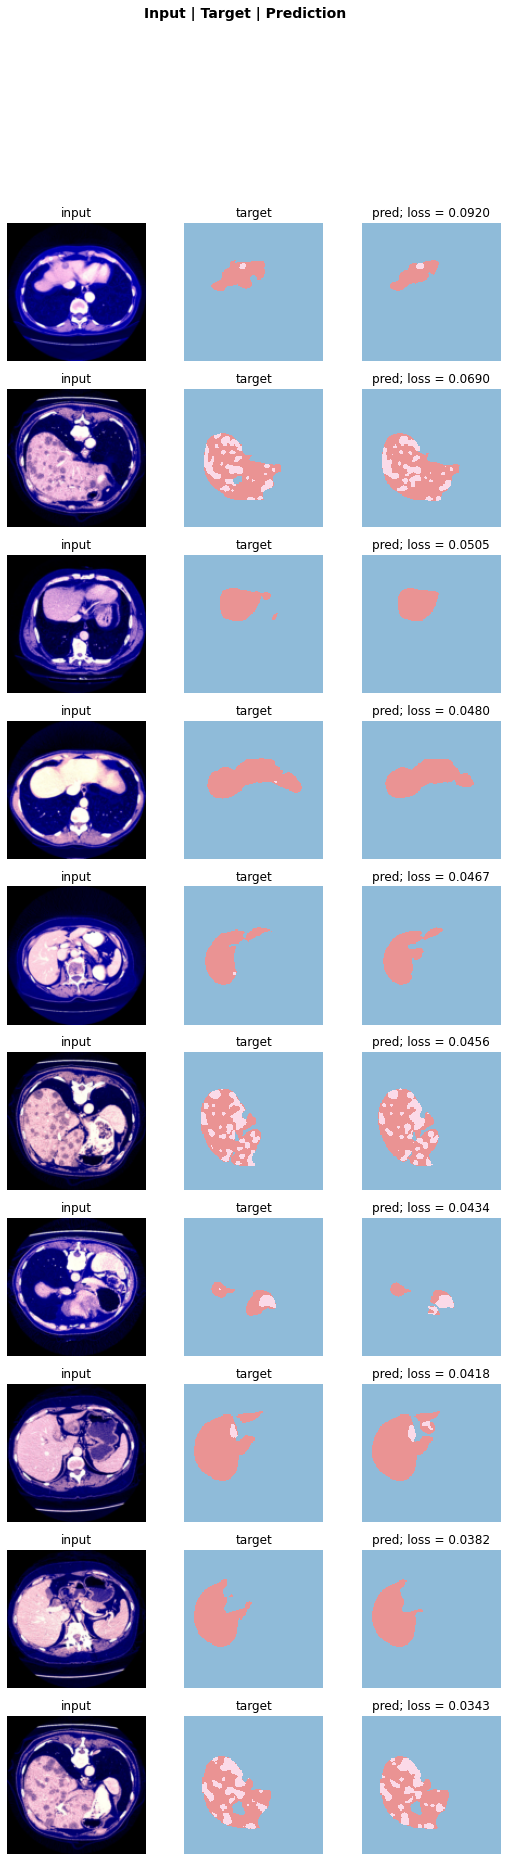

In [ ]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(10, nrows =3) 

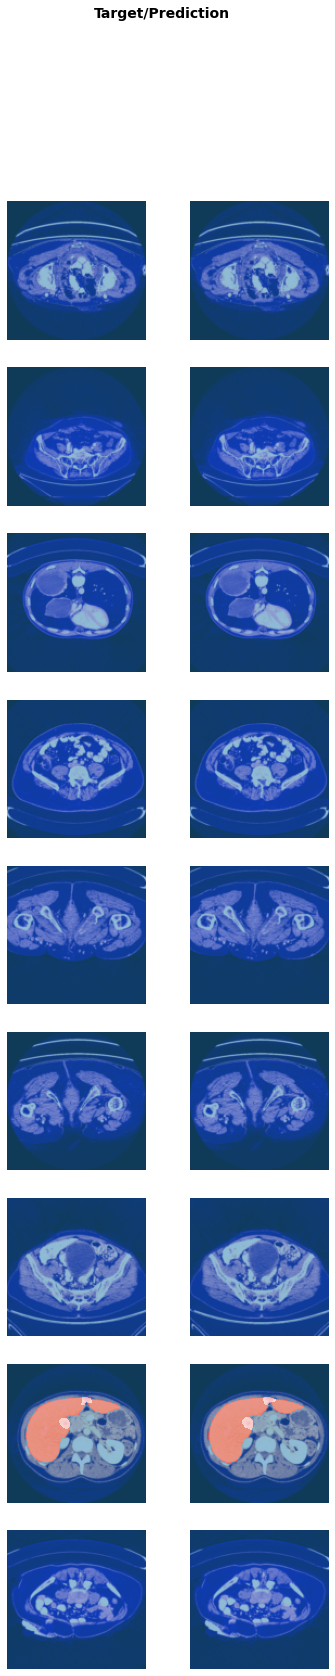

In [ ]:
learn.show_results()

In [ ]:
learn_50 = unet_learner(dls, resnet50, loss_func=CrossEntropyLossFlat(axis=1), metrics=[foreground_acc, cust_foreground_acc])

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1121: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:136: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The cur

  0%|          | 0.00/97.8M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1121: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


SuggestedLRs(valley=0.00019054606673307717)

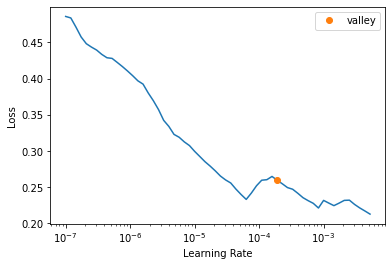

In [ ]:
learn_50.lr_find()

In [ ]:
learn_50.fine_tune(30, wd=0.1, cbs=SaveModelCallback() )

epoch,train_loss,valid_loss,foreground_acc,cust_foreground_acc,time
0,0.014590,0.010609,0.891970,0.996050,05:23


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1121: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


Better model found at epoch 0 with valid_loss value: 0.010608738288283348.


epoch,train_loss,valid_loss,foreground_acc,cust_foreground_acc,time
0,0.006866,0.006718,0.949854,0.997567,05:32
1,0.005264,0.005685,0.948109,0.997927,05:32
2,0.005007,0.005430,0.947754,0.997987,05:32
3,0.004657,0.004858,0.949992,0.998166,05:32
4,0.004197,0.005035,0.961515,0.998170,05:32
5,0.004527,0.004623,0.958909,0.998288,05:32
6,0.004011,0.004141,0.955070,0.998447,05:32
7,0.004137,0.004124,0.957301,0.998479,05:32
8,0.003816,0.004012,0.955278,0.998510,05:32
9,0.003198,0.003604,0.967139,0.998587,05:32


Better model found at epoch 0 with valid_loss value: 0.0067182076163589954.
Better model found at epoch 1 with valid_loss value: 0.005684690549969673.
Better model found at epoch 2 with valid_loss value: 0.005429981276392937.
Better model found at epoch 3 with valid_loss value: 0.004857656080275774.
Better model found at epoch 5 with valid_loss value: 0.004623060580343008.
Better model found at epoch 6 with valid_loss value: 0.0041410536505281925.
Better model found at epoch 7 with valid_loss value: 0.004123772494494915.
Better model found at epoch 8 with valid_loss value: 0.004011834040284157.
Better model found at epoch 9 with valid_loss value: 0.0036043869331479073.
Better model found at epoch 10 with valid_loss value: 0.0036003440618515015.
Better model found at epoch 11 with valid_loss value: 0.0032097529619932175.
Better model found at epoch 13 with valid_loss value: 0.0031681556720286608.
Better model found at epoch 14 with valid_loss value: 0.003064054297283292.
Better model fo

epoch,train_loss,valid_loss,foreground_acc,cust_foreground_acc,time
0,0.006866,0.006718,0.949854,0.997567,05:32
1,0.005264,0.005685,0.948109,0.997927,05:32
2,0.005007,0.005430,0.947754,0.997987,05:32
3,0.004657,0.004858,0.949992,0.998166,05:32
4,0.004197,0.005035,0.961515,0.998170,05:32
5,0.004527,0.004623,0.958909,0.998288,05:32
6,0.004011,0.004141,0.955070,0.998447,05:32
7,0.004137,0.004124,0.957301,0.998479,05:32
8,0.003816,0.004012,0.955278,0.998510,05:32
9,0.003198,0.003604,0.967139,0.998587,05:32


In [ ]:
interp = Interpretation.from_learner(learn_50)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1121: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1121: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


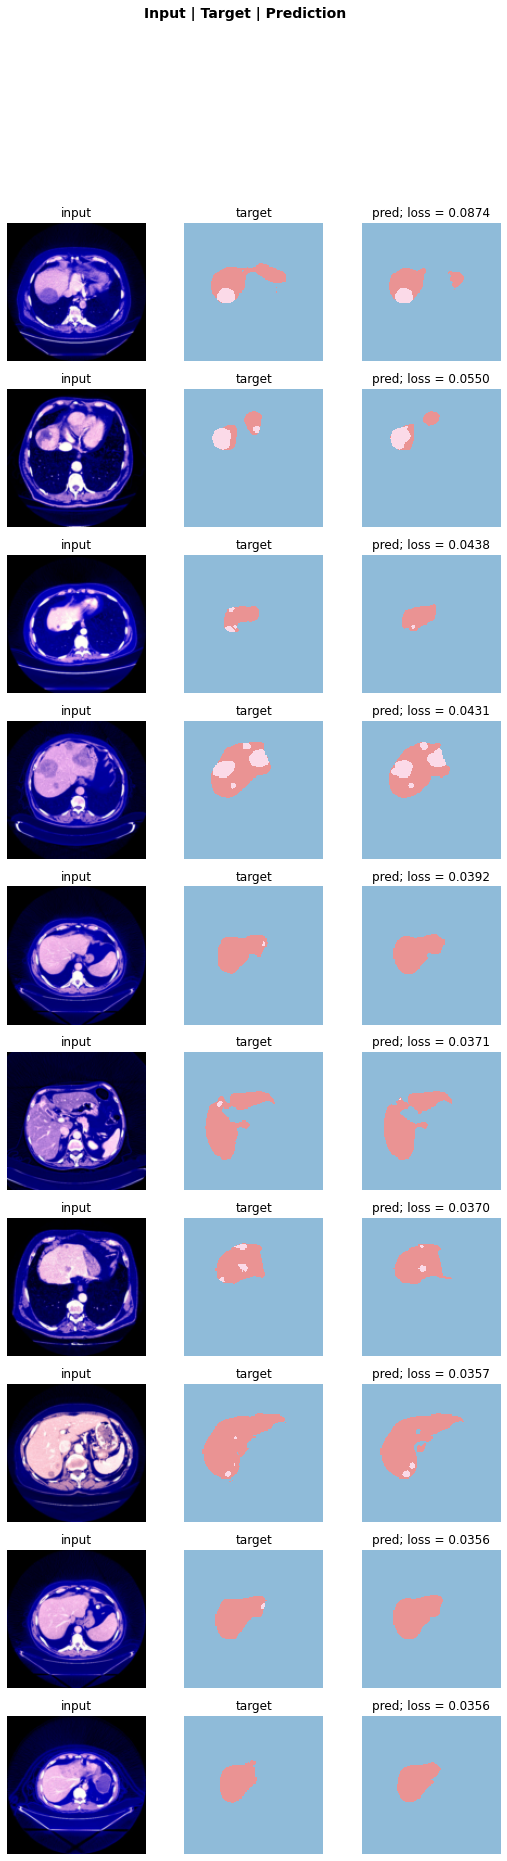

In [ ]:
interp.plot_top_losses(10, nrows =3)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1121: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


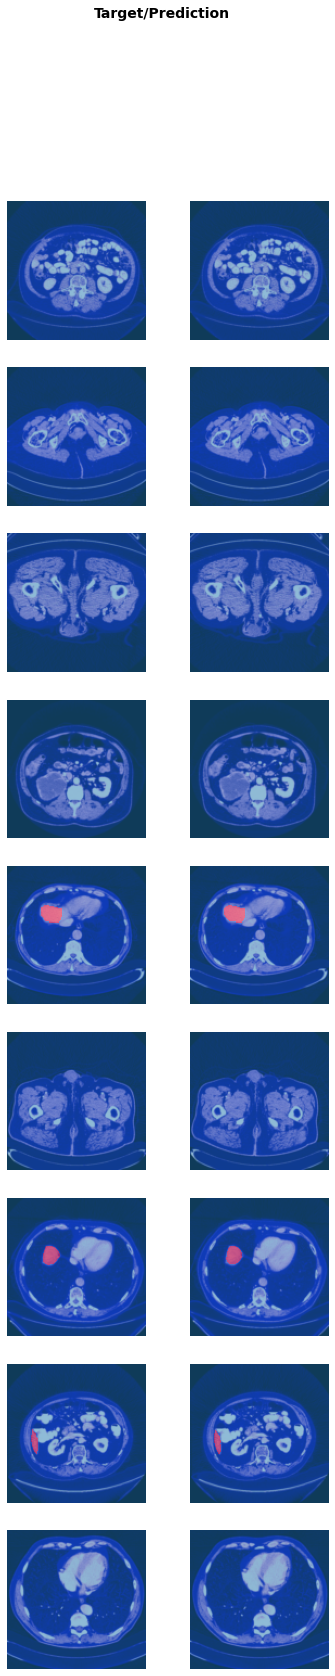

In [ ]:
learn_50.show_results()

In [ ]:
# Save the model
learn.export(path/f'Liver_segmentation')

In [ ]:
import gc
del learn
gc.collect()
torch.cuda.empty_cache()

In [ ]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import glob

import nibabel as nib
import cv2
import imageio
from tqdm.notebook import tqdm
from ipywidgets import *
from PIL import Image


import fastai; 
print(fastai.__version__)
from fastai.basics import *
from fastai.vision.all import *
from fastai.data.transforms import *


2.7.9


In [ ]:
# Load saved model
bs = 16
im_size = 128

# the labels used for the classes
# When predicting the model predicts it in terms of indices (ie 0 --> background, 1 --> liver ...)
codes = np.array(["background","liver","tumor"])

# the default pathb
path = './'

def get_x(fname:Path): 
    return fname

def label_func(x): 
    return path/'train_masks'/f'{x.stem}_mask.png'

def foreground_acc(inp, targ, bkg_idx=0, axis=1):  # exclude a background from metric
    "Computes non-background accuracy for multiclass segmentation"
    targ = targ.squeeze(1)
    mask = targ != bkg_idx
    return (inp.argmax(dim=axis)[mask]==targ[mask]).float().mean() 

def cust_foreground_acc(inp, targ):  # # include a background into the metric
    return foreground_acc(inp=inp, targ=targ, bkg_idx=3, axis=1) # 3 is a dummy value to include the background which is 0

In [ ]:
# loading the tensor flow model
tfms = [Resize(im_size), IntToFloatTensor(),Normalize()]
learn0 = load_learner('Liver_segmentation',cpu=False )
learn0.dls.transform = tfms

In [ ]:
def nii_tfm(fn,wins): 

    test_nii  = read_nii(fn)
    curr_dim  = test_nii.shape[2] # 512, 512, curr_dim
    slices = []
    data = tensor(test_nii[...,60].astype(np.float32))
    data = (data.to_nchan(wins)*255).byte()
    slices.append(TensorImage(data))
    print(slices)
    return slices 

(512, 512, 230)


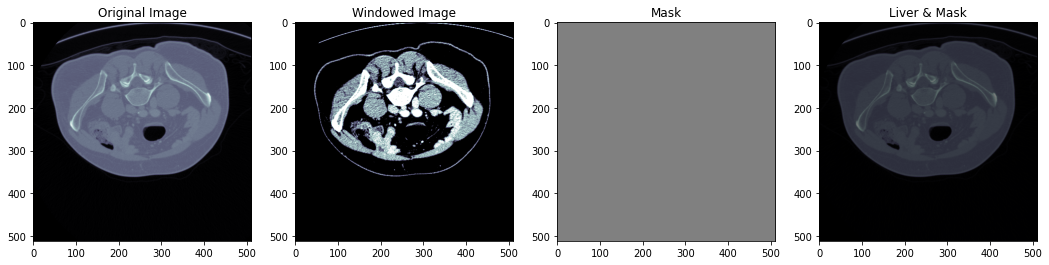

In [ ]:
# test number
tst = 92

# slice number
test_slice_idx = 92


test_nii   = read_nii(testing_data.loc[tst,'dirname']+"/"+testing_data.loc[tst,'filename'])
test_mask  = read_nii(testing_data.loc[tst,'mask_dirname']+"/"+testing_data.loc[tst,'mask_filename'])
print(test_nii.shape)

sample_slice = tensor(test_nii[...,test_slice_idx].astype(np.float32))

plot_sample([test_nii[...,test_slice_idx], test_mask[...,test_slice_idx]])

In [ ]:
# Prepare a nii test file for prediction 

test_files = nii_tfm(testing_data.loc[tst,'dirname']+"/"+testing_data.loc[tst,'filename'],[dicom_windows.liver, dicom_windows.custom])
print("Number of test slices: ",len(test_files))

[TensorImage([[[0, 0, 0,  ..., 0, 0, 0],
              [0, 0, 0,  ..., 0, 0, 0],
              [0, 0, 0,  ..., 0, 0, 0],
              ...,
              [0, 0, 0,  ..., 0, 0, 0],
              [0, 0, 0,  ..., 0, 0, 0],
              [0, 0, 0,  ..., 0, 0, 0]],

             [[0, 0, 0,  ..., 0, 0, 0],
              [0, 0, 0,  ..., 0, 0, 0],
              [0, 0, 0,  ..., 0, 0, 0],
              ...,
              [0, 0, 0,  ..., 0, 0, 0],
              [0, 0, 0,  ..., 0, 0, 0],
              [0, 0, 0,  ..., 0, 0, 0]],

             [[0, 0, 0,  ..., 0, 0, 0],
              [0, 0, 0,  ..., 0, 0, 0],
              [0, 0, 0,  ..., 0, 0, 0],
              ...,
              [0, 0, 0,  ..., 0, 0, 0],
              [0, 0, 0,  ..., 0, 0, 0],
              [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.uint8)]
Number of test slices:  1


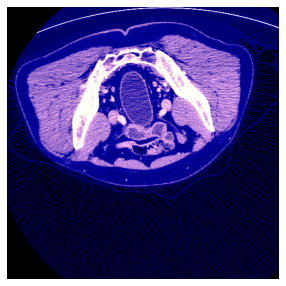

In [ ]:
# Check an input for a test file
show_image(test_files[0])

<class 'fastai.torch_core.TensorBase'>


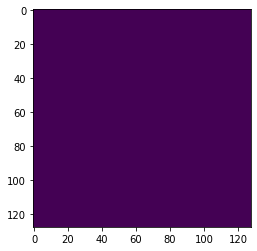

In [ ]:
# Get predictions for a Test file

test_dl = learn0.dls.test_dl(test_files)
preds,y = learn0.get_preds(dl=test_dl)

predicted_mask = np.argmax(preds, axis=1)
print(type(predicted_mask))
plt.imshow(predicted_mask[0])

In [ ]:
a=np.array(predicted_mask[0])

unique, counts = np.unique(a, return_counts=True)
print( np.array((unique, counts)).T)

np.amin(a),np.amax(a),

[[    0 16384]]


(0, 0)

  0%|          | 0/22 [00:00<?, ?it/s]

curr slice: 250
predicted [0]
actual: [0]


curr slice: 260
predicted [0]
actual: [0]


curr slice: 270
predicted [0]
actual: [0]


curr slice: 280
predicted [0]
actual: [0]


curr slice: 290
predicted [0]
actual: [0]


curr slice: 300
predicted [0]
actual: [0]


curr slice: 310
predicted [0]
actual: [0]


curr slice: 320
predicted [0]
actual: [0]


curr slice: 330
predicted [0]
actual: [0]


curr slice: 340
predicted [0]
actual: [0]


curr slice: 350
predicted [0]
actual: [0]


curr slice: 360
predicted [0]
actual: [0]


curr slice: 370
predicted [0]
actual: [0]


curr slice: 380
predicted [0]
actual: [0]


curr slice: 390
predicted [0 1]
actual: [0 1]


curr slice: 400
predicted [0 1]
actual: [0 1]


curr slice: 410
predicted [0 1 2]
actual: [0 1 2]


curr slice: 420
predicted [0 1]
actual: [0 1 2]


curr slice: 430
predicted [0 1 2]
actual: [0 1 2]


curr slice: 440
predicted [0 1 2]
actual: [0 1 2]


curr slice: 450
predicted [0 1 2]
actual: [0 1 2]


curr slice: 460
predicted [0 1 2]
actual: [0 1 2]


  0%|          | 0/22 [00:00<?, ?it/s]

curr slice: 250
predicted [0]
actual: [0]


curr slice: 260
predicted [0]
actual: [0]


curr slice: 270
predicted [0]
actual: [0]


curr slice: 280
predicted [0]
actual: [0]


curr slice: 290
predicted [0]
actual: [0]


curr slice: 300
predicted [0]
actual: [0]


curr slice: 310
predicted [0]
actual: [0]


curr slice: 320
predicted [0]
actual: [0]


curr slice: 330
predicted [0]
actual: [0]


curr slice: 340
predicted [0]
actual: [0]


curr slice: 350
predicted [0]
actual: [0]


curr slice: 360
predicted [0]
actual: [0]


curr slice: 370
predicted [0]
actual: [0]


curr slice: 380
predicted [0]
actual: [0]


curr slice: 390
predicted [0 1]
actual: [0 1]


curr slice: 400
predicted [0 1]
actual: [0 1]


curr slice: 410
predicted [0 1 2]
actual: [0 1 2]


curr slice: 420
predicted [0 1 2]
actual: [0 1 2]


curr slice: 430
predicted [0 1 2]
actual: [0 1 2]


curr slice: 440
predicted [0 1 2]
actual: [0 1 2]


curr slice: 450
predicted [0 1 2]
actual: [0 1 2]


curr slice: 460
predicted [0 1 2]
actual: [0 1 2]


  0%|          | 0/22 [00:00<?, ?it/s]

curr slice: 250
predicted [0]
actual: [0]


curr slice: 260
predicted [0]
actual: [0]


curr slice: 270
predicted [0]
actual: [0]


curr slice: 280
predicted [0]
actual: [0]


curr slice: 290
predicted [0]
actual: [0]


curr slice: 300
predicted [0]
actual: [0]


curr slice: 310
predicted [0]
actual: [0]


curr slice: 320
predicted [0]
actual: [0]


curr slice: 330
predicted [0]
actual: [0]


curr slice: 340
predicted [0]
actual: [0]


curr slice: 350
predicted [0]
actual: [0]


curr slice: 360
predicted [0]
actual: [0]


curr slice: 370
predicted [0]
actual: [0]


curr slice: 380
predicted [0 1]
actual: [0 1]


curr slice: 390
predicted [0 1]
actual: [0 1]


curr slice: 400
predicted [0 1]
actual: [0 1]


curr slice: 410
predicted [0 1]
actual: [0 1]


curr slice: 420
predicted [0 1]
actual: [0 1]


curr slice: 430
predicted [0 1]
actual: [0 1]


curr slice: 440
predicted [0 1]
actual: [0 1]


curr slice: 450
predicted [0 1]
actual: [0 1]


curr slice: 460
predicted [0 1]
actual: [0 1]
[[11  0]
 [ 1 54]]


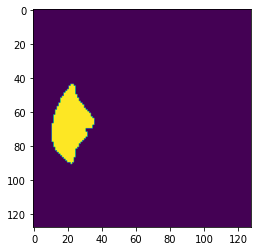

In [ ]:
def nii_tfm_selctive(fn,wins,curr_slice): 
    slices = []
    test_nii  = read_nii(fn)
    data = tensor(test_nii[...,curr_slice].astype(np.float32))
    data = (data.to_nchan(wins)*255).byte()
    slices.append(TensorImage(data))
    return slices

def check(img):
    cnt,h = cv2.findContours(img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    if len(cnt) > 0:
        return 1
    else:
        return 0
    

nums = [3,4,5]
vol_names = ['volume-39.nii','volume-40.nii','volume-41.nii']
seg_names = ['segmentation-39.nii','segmentation-40.nii','segmentation-41.nii']


conf_matrix =  np.zeros((2,2),dtype = int)


for nums,vol_names,seg_names in zip(nums,vol_names,seg_names):
    curr_mask      = read_nii(training_data.loc[nums,'mask_dirname']+"/"+training_data.loc[nums,'mask_filename'])
    for curr_slice in tqdm(range(250,466,10)): # export every 10th slice for testing
        
        # for prediction
        test_file = nii_tfm_selctive(training_data.loc[nums,'dirname']+"/"+training_data.loc[nums,'filename'],[dicom_windows.liver, dicom_windows.custom],curr_slice)
        test_dl = learn0.dls.test_dl(test_file)
        preds, y = learn0.get_preds(dl=test_dl)
        
        predicted_mask = np.argmax(preds, axis=1)# getting the predicted mask
        plt.imshow(predicted_mask[0])
        a=np.array(predicted_mask[0])
        
        tumor_p = False
        
        print('curr slice:',curr_slice)
        
        unique = np.unique(a)
        print("predicted",unique)
        if 0 in unique:
            back_p = True
        else:
            back_p = False
        if 1 in unique:
            liver_p = True
        else:
            liver_p = False
        if 2 in unique:
            tumor_p = True
        else:
            tumor_p = False
        

        # for getiing the actual mask values
        mask = Image.fromarray(curr_mask[...,curr_slice].astype('uint8'), mode="L")
        tumor_t = False
        
        unique = np.unique(mask)
        print("actual:",unique)
        if 0 in unique:
            back_t = True
        else:
            back_t = False
        if 1 in unique:
            liver_t = True
        else:
            liver_t = False
        if 2 in unique:
            tumor_t = True
        else:
            tumor_t = False
            
        # populating the conf_matrix
        if tumor_p == True and tumor_t == True:
            conf_matrix[0,0] += 1
        if tumor_p == False and tumor_t == False:
            conf_matrix[1,1] += 1
        if tumor_p == False and tumor_t == True:
            conf_matrix[1,0] += 1
        if tumor_p == True and tumor_t == False:
            conf_matrix[0,1] += 1
            
        
print(conf_matrix)

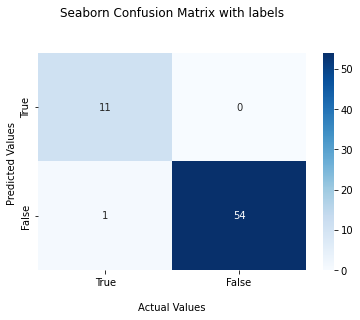

In [ ]:
import seaborn as sns

ax = sns.heatmap(conf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nActual Values')
ax.set_ylabel('Predicted Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.6 MB 3.7 MB/s 
     |████████████████████████████████| 54 kB 2.6 MB/s 
     |████████████████████████████████| 54 kB 2.8 MB/s 
     |████████████████████████████████| 2.3 MB 46.4 MB/s 
     |████████████████████████████████| 275 kB 59.1 MB/s 
     |████████████████████████████████| 84 kB 3.4 MB/s 
     |████████████████████████████████| 212 kB 52.8 MB/s 
     |████████████████████████████████| 57 kB 4.5 MB/s 
     |████████████████████████████████| 84 kB 3.0 MB/s 
     |████████████████████████████████| 141 kB 54.6 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 80 kB 8.2 MB/s 
     |████████████████████████████████| 68 kB 6.1 MB/s 
     |████████████████████████████████| 43 kB 2.0 MB/s 
     |████████████████████████████████| 62 kB 944 kB/s 
     |████████████████████████████████| 856 kB 49.3 

In [ ]:
import gradio

In [ ]:
import gradio as gr

def greet(name):
  return 'Hello ' + name + '!'


iface = gr.Interface(fn=greet, inputs='text', outputs='text')
iface.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://27543.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7f1c0110c4d0>,
 'http://127.0.0.1:7860/',
 'https://27543.gradio.app')

In [ ]:
import tensorflow as tf

print(tf.__version__)

2.8.2


In [ ]:
import gradio as gr
import tensorflow as tf
import numpy as np
import requests

inception_net = tf.keras.applications.InceptionV3() #load the model

response = requests.get("https://git.io//JJkYN")
labels = response.text.split("\n")

def Classify_image(inp):
  inp = inp.reshape((-1, 299, 299, 3))
  inp = tf.keras.applications.inception_v3.proprocess_input(inp)
  prediction = inception_net.predict(inp).flatten()
  return {labels[i]: float(prediction[i]) for i in range(1000)}

image = gr.inputs.Image(shape=(299,299))
label = gr.outputs.Label(num_top_classes = 3)

gr.Interface(fn=Classify_image, inputs=image, outputs=label, capture_session = True).launch()

96124928/96112376 [==============================] - 1s 0us/step


/usr/local/lib/python3.7/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  "Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  "Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
 

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://55461.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7f1b16234b10>,
 'http://127.0.0.1:7861/',
 'https://55461.gradio.app')

In [ ]:
!pip install django

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.9 MB 2.7 MB/s 


In [ ]:
!django-admin startproject webApplication

In [ ]:
!ls

flagged  sample_data  webApplication


In [ ]:
%cd webApplication/

/content/webApplication


In [ ]:
from google.colab.output import eval_js
print(eval_js("google.colab.kernel.proxyPort(8000)"))

https://i1njwf0okc-496ff2e9c6d22116-8000-colab.googleusercontent.com/


In [ ]:
ALLOWED_HOSTS = ['colab.research.google.com']

In [ ]:
!python manage.py runserver 8000

Watching for file changes with StatReloader
Performing system checks...

System check identified no issues (0 silenced).

You have 18 unapplied migration(s). Your project may not work properly until you apply the migrations for app(s): admin, auth, contenttypes, sessions.
Run 'python manage.py migrate' to apply them.
August 05, 2022 - 03:42:57
Django version 3.2.15, using settings 'webApplication.settings'
Starting development server at http://127.0.0.1:8000/
Quit the server with CONTROL-C.
Invalid HTTP_HOST header: 'colab.research.google.com'. You may need to add 'colab.research.google.com' to ALLOWED_HOSTS.
Bad Request: /
[05/Aug/2022 03:44:49] "GET / HTTP/1.1" 400 70164
